### Task 3.1
*Write a program whose input is the training set, a user-specified value of $k$ and an object $\mathbf{x}$. The output is the class label of $\mathbf{x}$.*

In [230]:
import pandas as pd
from math import sqrt
import numpy as np

def distance(row, x):
    d = 0
    for key, value in x.items():
        d += (row[key] - value)**2
    return sqrt(d)
def classify(training_set, k, x):
    distances = []
    i = 0
    for index, row in training_set.iterrows():
        d = distance(row, x)
        distances.append((index, d))
    distances = sorted(distances, key = lambda dist: dist[1])
    nearest_neighbors_indices = [item[0] for item in distances[0:k]]
    nearest_neighbors = training_set.iloc[nearest_neighbors_indices]
    return nearest_neighbors['class'].value_counts().idxmax()
def normalize_each_column(data):
    attributes = list(data.columns.values); attributes.remove('class')
    for attribute in attributes:
        data[attribute]=((data[attribute]-data[attribute].min())
                        /(data[attribute].max()-data[attribute].min()))
    return data

**Test on 'example1.csv'**

In [198]:
data = pd.read_csv('example1.csv')
display(data)
x = pd.DataFrame.from_dict({'at1': [3.1], 'at2': [2], 'at3':[1.99] })

,at1,at2,at3,class
0,3.2,2.1,2.10,pos
1,5.2,6.1,7.50,pos
2,8.5,1.3,0.50,pos
3,2.3,5.4,2.45,neg
4,6.2,3.1,4.40,neg
5,1.3,6.0,3.35,neg


In [137]:
print("The most probable class of x:", classify(data, 1, x))

The most probable class of x: pos


**Checking on 'wines'**

In [247]:
data = pd.read_csv('wines.csv')
data = normalize_each_column(data)
display(data.head())
msk = np.random.rand(len(data)) < 0.8
train = ((data.iloc[msk]).reset_index()).drop(columns='index')
display(train.head())
test = ((data.iloc[~msk]).reset_index()).drop(columns='index')
display(test.head())

full data


,class,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,OD280-OD315-of-diluted-wines,proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


,class,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,OD280-OD315-of-diluted-wines,proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
2,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
3,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
4,1,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949


,class,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,OD280-OD315-of-diluted-wines,proline
0,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
1,1,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
2,1,0.860526,0.233202,0.727273,0.484536,0.543478,0.627586,0.590717,0.377358,0.492114,0.419795,0.479675,0.505495,0.714693
3,1,0.621053,0.203557,0.673797,0.283505,0.250000,0.644828,0.548523,0.396226,0.328076,0.300341,0.357724,0.714286,0.654066
4,1,0.597368,0.193676,0.417112,0.329897,0.260870,0.489655,0.390295,0.264151,0.296530,0.227816,0.439024,0.549451,0.718260


In [232]:
attributes = list(train.columns.values); attributes.remove('class');
x = test[attributes]
display(x.head())

,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,OD280-OD315-of-diluted-wines,proline
0,0.978947,0.195652,0.550802,0.041237,0.228261,0.731034,0.706751,0.566038,0.757098,0.351536,0.626016,0.534799,0.621969
1,0.478947,0.169960,0.620321,0.371134,0.271739,0.517241,0.428270,0.245283,0.331230,0.226109,0.495935,0.864469,0.525678
2,0.652632,0.209486,0.689840,0.432990,0.434783,0.472414,0.462025,0.301887,0.356467,0.249147,0.504065,0.586081,0.582739
3,0.665789,0.191700,0.508021,0.288660,0.510870,0.748276,0.622363,0.396226,0.608833,0.413823,0.382114,0.772894,0.368759
4,0.626316,0.612648,0.406417,0.422680,0.217391,0.506897,0.493671,0.264151,0.337539,0.255973,0.349593,0.633700,0.539943


In [244]:
import matplotlib.pyplot as plt
s = []
kVals = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50, 70, 90, 110, 130]
for k in kVals:
    success = 0
    fail = 0
    for i in range(len(test)):
        v = x.iloc[i]
        class_v = (test.iloc[i])['class'] 
        result = classify(train, k, v)
        if result == class_v:
            success += 1
        else:
            fail += 1
    s.append(100*success/len(test))

# print("Successes: ","{0:.2f}".format(100*success/len(test)) ,"%")
# print("Fails: ", "{0:.2f}".format(100*fail/len(test)) ,"%")

Successes:  51.35 %
Fails:  48.65 %


#### Plot how well it works

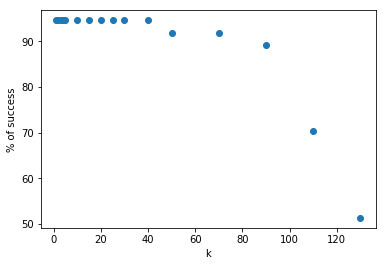

In [246]:
plt.ylabel("% of success")
plt.xlabel("k")
# plt.axis([1, 20, 96.85, 96.9])
plt.plot(kVals, s, 'o')
plt.show()